In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.stats as ss
import pingouin as pg

In [64]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

In [3]:
med = pd.read_csv(Path.cwd() / 'data' / 'medFactor.csv')
med.head()

,lung,muscle,liver,skeleton,kidneys,heart,step,stamina,stretch,blow,urine
0,20,16,52,10,24,23,19,20,23,29,67
1,24,16,52,7,27,16,16,15,31,33,59
2,19,21,57,18,22,23,16,19,42,40,61
3,24,21,62,12,31,25,17,17,36,36,77
4,29,18,62,14,26,27,15,20,33,29,88


In [4]:
pg.multivariate_normality(med, alpha=0.1)

HZResults(hz=124.8479134609871, pval=0.0, normal=False)

In [5]:
ss.shapiro(med['lung'])

ShapiroResult(statistic=0.9579742550849915, pvalue=0.0005490659968927503)

In [6]:
med.describe()

,lung,muscle,liver,skeleton,kidneys,heart,step,stamina,stretch,blow,urine
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,19.960938,18.820312,54.695312,12.867188,25.640625,23.179688,16.171875,15.867188,38.812500,33.539062,66.906250
std,4.464034,4.088458,7.428990,2.986508,3.805786,4.159106,2.478599,2.651314,7.798395,4.097055,12.565067
min,4.000000,9.000000,26.000000,3.000000,16.000000,11.000000,4.000000,7.000000,16.000000,17.000000,9.000000
25%,17.000000,16.000000,50.750000,11.000000,23.000000,22.000000,15.000000,14.000000,34.000000,32.000000,59.000000
50%,20.000000,19.000000,55.000000,13.000000,26.000000,23.000000,17.000000,16.000000,40.000000,34.000000,67.000000
75%,23.000000,22.000000,60.250000,15.000000,29.000000,25.000000,18.000000,18.000000,45.000000,36.000000,76.000000
max,29.000000,28.000000,69.000000,19.000000,32.000000,56.000000,20.000000,20.000000,51.000000,41.000000,93.000000


In [7]:
fa = FactorAnalyzer(rotation=None).fit(med)
ev, v = fa.get_eigenvalues()
ev, v

(array([3.37918137, 1.48277065, 1.25063015, 0.98047706, 0.7688022 ,
        0.73305114, 0.64039936, 0.62219335, 0.52837181, 0.35193006,
        0.26219284]),
 array([ 2.87429658,  0.92121209,  0.82708599,  0.32961252,  0.14798142,
         0.11630939,  0.03260218, -0.078728  , -0.09010899, -0.16583141,
        -0.29405096]))

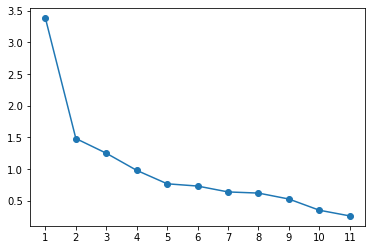

In [8]:
plt.plot(ev, marker='o')
plt.xticks(ticks=np.arange(11), labels=np.arange(1, 12))
plt.show()

In [9]:
fa_varimax = FactorAnalyzer(n_factors=4, rotation='varimax', method='principal').fit(med)
fa_varimax.loadings_

array([[ 0.82808075, -0.01127504,  0.08628291,  0.04859413],
       [ 0.01442068, -0.11105114,  0.79811225,  0.17111399],
       [ 0.7863582 ,  0.04631129,  0.12820724,  0.28811684],
       [ 0.23753121,  0.20612517,  0.77433075,  0.02258082],
       [ 0.46421471,  0.28567006, -0.10031512,  0.57747284],
       [ 0.12372203,  0.027651  ,  0.25408005,  0.85274757],
       [ 0.44383384,  0.46051392,  0.12988849,  0.22842996],
       [ 0.03123887,  0.61165478,  0.35338127, -0.00875328],
       [ 0.5247712 ,  0.49466448,  0.31331989, -0.33315929],
       [ 0.23509342,  0.71035045,  0.02228321,  0.12646836],
       [-0.12724924,  0.71674351, -0.19021636,  0.03657157]])

In [10]:
# communality와 인자고유분산(uniqueness)
fa_varimax.get_communalities(), fa_varimax.get_uniquenesses()

(array([0.69565099, 0.67880347, 0.71995236, 0.69900667, 0.6406407 ,
        0.80780681, 0.47811281, 0.50005238, 0.72924223, 0.57635746,
        0.56743336]),
 array([0.30434901, 0.32119653, 0.28004764, 0.30099333, 0.3593593 ,
        0.19219319, 0.52188719, 0.49994762, 0.27075777, 0.42364254,
        0.43256664]))

In [11]:
fa_df = pd.DataFrame(fa_varimax.loadings_, index=med.columns, columns=['F1', 'F2', 'F3', 'F4'])
fa_df

,F1,F2,F3,F4
lung,0.828081,-0.011275,0.086283,0.048594
muscle,0.014421,-0.111051,0.798112,0.171114
liver,0.786358,0.046311,0.128207,0.288117
skeleton,0.237531,0.206125,0.774331,0.022581
kidneys,0.464215,0.285670,-0.100315,0.577473
heart,0.123722,0.027651,0.254080,0.852748
step,0.443834,0.460514,0.129888,0.228430
stamina,0.031239,0.611655,0.353381,-0.008753
stretch,0.524771,0.494664,0.313320,-0.333159
blow,0.235093,0.710350,0.022283,0.126468


In [12]:
fa_df.idxmax(axis=1)

lung        F1
muscle      F3
liver       F1
skeleton    F3
kidneys     F4
heart       F4
step        F2
stamina     F2
stretch     F1
blow        F2
urine       F2
dtype: object

In [13]:
fa_obm = FactorAnalyzer(n_factors=4, rotation='promax', method='principal').fit(med)
fa_obm.loadings_.round(3)

array([[ 0.945, -0.232, -0.049, -0.071],
       [-0.108, -0.181,  0.859,  0.221],
       [ 0.838, -0.152,  0.013,  0.183],
       [ 0.101,  0.106,  0.76 ,  0.023],
       [ 0.395,  0.223, -0.174,  0.51 ],
       [-0.036,  0.01 ,  0.297,  0.873],
       [ 0.348,  0.39 ,  0.037,  0.161],
       [-0.167,  0.638,  0.317, -0.014],
       [ 0.493,  0.372,  0.179, -0.421],
       [ 0.077,  0.724, -0.067,  0.074],
       [-0.299,  0.838, -0.234,  0.024]])

In [14]:
# communality와 인자고유분산(uniqueness)
fa_obm.get_communalities(), fa_obm.get_uniquenesses()

(array([0.95414288, 0.83086735, 0.75943936, 0.60004208, 0.49652333,
        0.85162308, 0.30052969, 0.53561803, 0.59095958, 0.54013375,
        0.84727643]),
 array([0.04585712, 0.16913265, 0.24056064, 0.39995792, 0.50347667,
        0.14837692, 0.69947031, 0.46438197, 0.40904042, 0.45986625,
        0.15272357]))

In [15]:
fa_df = pd.DataFrame(fa_obm.loadings_, index=med.columns, columns=['F1', 'F2', 'F3', 'F4'])
fa_df.idxmax(axis=1)

lung        F1
muscle      F3
liver       F1
skeleton    F3
kidneys     F4
heart       F4
step        F2
stamina     F2
stretch     F1
blow        F2
urine       F2
dtype: object

In [16]:
# return : variance, proportional_variance, cumulative_variance
fa_obm.get_factor_variance()

(array([2.26214499, 2.09579603, 1.62970148, 1.31951306]),
 array([0.20564954, 0.19052691, 0.14815468, 0.11995573]),
 array([0.20564954, 0.39617646, 0.54433114, 0.66428687]))

In [17]:
fa_obm = FactorAnalyzer(n_factors=7, rotation='promax', method='principal').fit(med)
fa_obm.loadings_.round(3)

array([[ 0.977,  0.068,  0.051, -0.121,  0.05 , -0.048, -0.104],
       [ 0.073,  0.08 ,  0.875,  0.122, -0.14 ,  0.032, -0.081],
       [ 0.773, -0.091, -0.006,  0.153, -0.037,  0.105,  0.08 ],
       [-0.059, -0.038,  0.704,  0.058,  0.418, -0.011,  0.063],
       [ 0.099,  0.037, -0.151,  0.648,  0.162, -0.181,  0.199],
       [-0.068, -0.071,  0.248,  0.95 , -0.219,  0.003, -0.012],
       [-0.049,  0.064, -0.051,  0.101, -0.   ,  0.144,  0.919],
       [ 0.026, -0.021,  0.036, -0.121,  0.002,  0.969,  0.154],
       [ 0.044, -0.071,  0.124, -0.266,  0.947, -0.098,  0.141],
       [-0.033,  0.093, -0.142,  0.276,  0.696,  0.234, -0.261],
       [ 0.004,  1.018,  0.077, -0.066, -0.036, -0.021,  0.074]])

In [18]:
# cumulative_variance의 결과값을 보고 유의미한지를 판단하는 것도 한 방법일듯
fa_obm.get_factor_variance()

(array([1.57975167, 1.08087522, 1.39254126, 1.55377666, 1.65397675,
        1.07086863, 1.03017618]),
 array([0.14361379, 0.09826138, 0.12659466, 0.14125242, 0.15036152,
        0.09735169, 0.09365238]),
 array([0.14361379, 0.24187517, 0.36846983, 0.50972226, 0.66008378,
        0.75743547, 0.85108785]))

In [19]:
med = pd.read_csv(Path.cwd() / 'data' / 'medFactor.csv')
med.head()

,lung,muscle,liver,skeleton,kidneys,heart,step,stamina,stretch,blow,urine
0,20,16,52,10,24,23,19,20,23,29,67
1,24,16,52,7,27,16,16,15,31,33,59
2,19,21,57,18,22,23,16,19,42,40,61
3,24,21,62,12,31,25,17,17,36,36,77
4,29,18,62,14,26,27,15,20,33,29,88


In [42]:
fa = FactorAnalyzer(n_factors=3, rotation='varimax', method='principal').fit(med)

In [43]:
fa.get_eigenvalues()

(array([3.37918137, 1.48277065, 1.25063015, 0.98047706, 0.7688022 ,
        0.73305114, 0.64039936, 0.62219335, 0.52837181, 0.35193006,
        0.26219284]),
 array([ 2.94446526,  1.03252448,  0.86348619,  0.50018404,  0.32746613,
         0.25552467,  0.21943899,  0.13355579,  0.07463731, -0.07247877,
        -0.16622191]))

In [44]:
# 이게 꽤 중요한 개념 → Xi가 가지고 있는 정보 중 q개의 factor들에 의하여 확보될 수 있는 정보의 비율
# 클 수록 설명력이 큰듯
fa.get_communalities()

array([0.4747417 , 0.6360021 , 0.65777589, 0.6977395 , 0.60567719,
       0.46257681, 0.47753807, 0.4678467 , 0.57033933, 0.56047876,
       0.50186613])

In [45]:
fa_loadings = pd.DataFrame(fa.loadings_, index=med.columns, columns=['FA1', 'FA2', 'FA3'])
fa_loadings

,FA1,FA2,FA3
lung,0.658785,0.123463,0.159689
muscle,0.110502,-0.085587,0.785154
liver,0.782771,0.126602,0.170345
skeleton,0.185113,0.285366,0.762915
kidneys,0.731159,0.229844,-0.135115
heart,0.645624,-0.107134,0.185117
step,0.486117,0.480344,0.102461
stamina,0.016222,0.619571,0.289335
stretch,0.179512,0.651887,0.336389
blow,0.264150,0.699354,-0.040085


In [46]:
fa_loadings.idxmax(axis=1)

lung        FA1
muscle      FA3
liver       FA1
skeleton    FA3
kidneys     FA1
heart       FA1
step        FA1
stamina     FA2
stretch     FA2
blow        FA2
urine       FA2
dtype: object

In [47]:
fa.transform(med)

array([[-0.12017945, -0.25849844, -0.74765823],
       [ 0.05719017, -0.48034107, -1.53801211],
       [-0.59386033,  0.89931313,  1.53198136],
       [ 1.2139429 ,  0.31922542, -0.42187331],
       [ 0.82614388,  0.15193952, -0.03000487],
       [-0.08639935,  1.14969113,  0.7658987 ],
       [-0.19714333, -1.80585521,  1.27206438],
       [-0.23114929, -0.80849976,  0.87159889],
       [ 1.38302324,  0.69841434,  0.42206183],
       [-0.27024468,  0.16027167,  0.11005332],
       [-0.44051353, -0.8317711 , -0.4774911 ],
       [ 0.82816353,  0.20427674, -0.24764435],
       [-0.17672516,  0.07929663,  1.28065825],
       [-0.82283198, -0.27156673, -0.06982012],
       [-1.92498535,  0.67021139, -0.78885024],
       [-0.68966187, -2.33838587,  2.70874853],
       [-1.2793416 ,  0.09529534, -0.93048784],
       [ 0.12865237, -0.25709453,  0.37860291],
       [ 0.10429399,  0.76420651, -1.0779211 ],
       [ 1.3946209 ,  0.74983265, -1.64232713],
       [ 0.6621099 ,  0.44540207,  0.842

In [50]:
fa.get_factor_variance()[2][2]

0.5556892890499564

In [62]:
cumul_var_list = []
for i in range(2, len(med.columns)):
    fa = FactorAnalyzer(n_factors=i, rotation='varimax', method='principal').fit(med)
    cumul_var_list.append(fa.get_factor_variance()[2][i-1])
cumul_var_list

[0.4419956386007845,
 0.5556892890499564,
 0.644823567479947,
 0.714714676613862,
 0.7813556893480657,
 0.8395738126714474,
 0.8961368447688329,
 0.9441706453172671,
 0.9761642873324815]

In [63]:
fa = FactorAnalyzer(n_factors=5, rotation='varimax', method='principal').fit(med)
fa.transform(med)

array([[ 3.47934621e-01,  1.50885963e+00, -2.47499163e-01,
        -1.49844031e-01, -2.09491128e+00],
       [ 9.36628536e-01, -2.49752052e-01, -1.68091357e+00,
        -8.85782283e-01, -6.38282398e-01],
       [-5.79754438e-01,  2.10743475e-01,  1.40823621e+00,
        -3.41407861e-01,  1.19733011e+00],
       [ 9.56522491e-01,  8.44762107e-01, -2.11608820e-01,
         9.16908882e-01, -4.91763339e-01],
       [ 1.69596248e+00,  1.77375995e+00,  3.78736692e-01,
        -1.77119897e-01, -1.86162470e+00],
       [-5.69406749e-01, -1.73764609e-02,  5.46195477e-01,
         2.93476290e-01,  1.82025467e+00],
       [ 9.77163425e-01, -4.76087070e-01,  1.44376890e+00,
        -1.14162736e+00, -2.25301776e+00],
       [-6.22947324e-01, -1.40546224e+00,  6.99304492e-01,
         1.11203853e-01,  4.29086629e-01],
       [ 1.10101153e+00,  6.18814418e-01,  4.71477980e-01,
         9.05037171e-01,  3.38585010e-01],
       [-3.30275812e-01,  8.82431582e-01,  3.91471633e-01,
         1.33292545e-01

In [65]:
scaler = StandardScaler()
med_sc = scaler.fit_transform(med)
med_sc

array([[ 0.00878488, -0.69253353, -0.36423565, ..., -2.03562815,
        -1.11223726,  0.00749048],
       [ 0.90835632, -0.69253353, -0.36423565, ..., -1.00574513,
        -0.13209014, -0.63169707],
       [-0.21610798,  0.53522674,  0.31144787, ...,  0.41034401,
         1.58316733, -0.47190018],
       ...,
       [ 0.00878488,  0.04412263, -0.09396224, ...,  0.28160864,
        -0.37712692, -0.55179863],
       [-0.89078657, -0.69253353, -0.63450906, ..., -0.49080363,
        -0.13209014, -1.27088462],
       [-0.21610798,  1.02633085,  0.44658458, ...,  1.18275628,
         0.11294664,  0.80647492]])

In [66]:
# Standard Scaler 이후 진행해봐도 분산의 차이는 없음 → 굳이 할 필요 없는듯?
cumul_var_list = []
for i in range(2, len(med.columns)):
    fa = FactorAnalyzer(n_factors=i, rotation='varimax', method='principal').fit(med_sc)
    cumul_var_list.append(fa.get_factor_variance()[2][i-1])
cumul_var_list

[0.44199563860078467,
 0.5556892890499562,
 0.6448235674799472,
 0.7147146766138627,
 0.7813556893480658,
 0.8395738126714481,
 0.8961368447688327,
 0.9441706453172666,
 0.9761642873324823]

In [68]:
fa = FactorAnalyzer(n_factors=5, rotation='varimax', method='principal').fit(med_sc)
fa.loadings_

array([[ 0.87004907,  0.00921907,  0.08258948,  0.03498331,  0.1072214 ],
       [ 0.09417789,  0.00117163,  0.8294996 ,  0.07844825, -0.09775949],
       [ 0.80759781,  0.03476668,  0.12997899,  0.28638161,  0.10482369],
       [ 0.13027656,  0.02958834,  0.71925583,  0.09988428,  0.4178264 ],
       [ 0.34240766,  0.07472371, -0.127307  ,  0.68980428,  0.26494277],
       [ 0.09869622, -0.02013106,  0.28940344,  0.84967069, -0.08674361],
       [ 0.43061927,  0.3898416 ,  0.10656597,  0.27706944,  0.27114678],
       [ 0.08933876,  0.64853046,  0.33889784, -0.01112719,  0.21597578],
       [ 0.26253396,  0.07582888,  0.17399142, -0.09250441,  0.86919574],
       [ 0.0183031 ,  0.35223148, -0.07598097,  0.34199138,  0.66939841],
       [-0.01416714,  0.83227077, -0.18032652,  0.01329187,  0.04551925]])